<a href="https://colab.research.google.com/github/desbaa32/Projet-M2BD-Index-Syst-me_multimodal_recommandation_produits/blob/master/DataExploration_and_DescriptorExtraction__f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Partie 1 : Analyse exploratoire du dataset**

## ***1. Exploration initiale***
    chargement dataset

In [1]:
# Installation
# !pip install datasets pillow pandas matplotlib seaborn wordcloud

# Imports
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from PIL import Image
import requests
from io import BytesIO
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Charger le dataset HuggingFace
dataset = load_dataset("DBQ/Chanel.Product.prices.Germany")

df = pd.DataFrame(dataset['train'])
def show_dataset(df):
  print(f"Shape du dataset : {df.shape}")
  display(df.head())
show_dataset(df)

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001-d681c47b79d440(…):   0%|          | 0.00/200k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1428 [00:00<?, ? examples/s]

Shape du dataset : (1428, 17)


,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,5200.0,5200.0,5200.0,0
1,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PA67085Y09953,n.a.,https://www.chanel.com/de/mode/p/A67085Y099539...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0,5750.0,5750.0,5750.0,0
2,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,BLUE LIGHT GLASSES,N.A.,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,420.0,420.0,420.0,0
3,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://www.chanel.com/de/brillen/p/A71449X099...,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,580.0,580.0,580.0,0
4,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,SUNGLASSES,N.A.,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://www.chanel.com/de/brillen/p/A71466X010...,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,480.0,480.0,480.0,0


### Presentation dataset

In [2]:


def show_info_dataset(df):
  print("__ Infos générales __")
  print(df.info())
  print("\n__ Colonnes __")
  print(df.columns.tolist())

def describe_dataset_values(df):
  print("___  Statistiques descriptives ___ \n")
  print("\t _Valeurs numeriques ")
  print(df.describe())
  print("\t _Valeurs Categorielles ")
  print(df.describe(include=['object']))

def missing_values(df):
  print("___  Valeurs manquantes ___ \n")
  missing = df.isnull().sum()
  missing_percent = (missing / len(df)) * 100
  missing_df = pd.DataFrame({
      'Colonne': missing.index,
      'Manquantes': missing.values,
      'Pourcentage': missing_percent.values
  })
  print(missing_df[missing_df['Manquantes'] > 0].sort_values('Manquantes', ascending=False))
  display(missing_df.head())


show_info_dataset(df)

__ Infos générales __
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website_name     1428 non-null   object 
 1   competence_date  1428 non-null   object 
 2   country_code     1428 non-null   object 
 3   currency_code    1428 non-null   object 
 4   brand            1428 non-null   object 
 5   category1_code   1428 non-null   object 
 6   category2_code   1428 non-null   object 
 7   category3_code   1428 non-null   object 
 8   product_code     1428 non-null   object 
 9   title            1428 non-null   object 
 10  itemurl          1428 non-null   object 
 11  imageurl         1428 non-null   object 
 12  full_price       1428 non-null   float64
 13  price            1428 non-null   float64
 14  full_price_eur   1428 non-null   float64
 15  price_eur        1428 non-null   float64
 16  flg_discount     1428 non-null   int64

In [3]:
describe_dataset_values(df)

___  Statistiques descriptives ___ 

	 _Valeurs numeriques 
          full_price          price  full_price_eur      price_eur  \
count    1428.000000    1428.000000     1428.000000    1428.000000   
mean     6076.253725    6076.253725     6076.253725    6076.253725   
std     15219.005999   15219.005999    15219.005999   15219.005999   
min        23.000000      23.000000       23.000000      23.000000   
25%       195.000000     195.000000      195.000000     195.000000   
50%      1415.000000    1415.000000     1415.000000    1415.000000   
75%      5800.000000    5800.000000     5800.000000    5800.000000   
max    142000.000000  142000.000000   142000.000000  142000.000000   

       flg_discount  
count        1428.0  
mean            0.0  
std             0.0  
min             0.0  
25%             0.0  
50%             0.0  
75%             0.0  
max             0.0  
	 _Valeurs Categorielles 
       website_name competence_date country_code currency_code   brand  \
count      

In [4]:
missing_values(df)

___  Valeurs manquantes ___ 

Empty DataFrame
Columns: [Colonne, Manquantes, Pourcentage]
Index: []


,Colonne,Manquantes,Pourcentage
0,website_name,0,0.0
1,competence_date,0,0.0
2,country_code,0,0.0
3,currency_code,0,0.0
4,brand,0,0.0


#### REduction dataset (colonnes non important)

In [5]:
# Colonnes importantes
colonnes_importantes = ['category1_code', 'category2_code', 'title',
                        'imageurl', 'price_eur', 'product_code'] # 'price'

# Colonnes à supprimer (redondantes ou non pertinentes)
colonnes_a_supprimer = ['website_name', 'competence_date', 'country_code',
                        'currency_code', 'brand', 'category3_code',
                        'full_price', 'full_price_eur', 'flg_discount','price','itemurl']

def reduct_dataset(df, colonnes_importantes, colonnes_a_supprimer):
  # # Colonnes importantes
  # df = df[colonnes_importantes]
  # Créer le dataset réduit
  df_clean = df.drop(columns=colonnes_a_supprimer)
  print(f"\n Colonnes principales pour l'analyse: {colonnes_importantes}")
  print(f"\n Colonnes supprimées: {len(colonnes_a_supprimer)}")
  print(f" Nouvelles dimensions: {df_clean.shape}")
  # df_clean.head()
  print(f"\n Colonnes conservées:")
  for col in df_clean.columns:
      print(f"  - {col}")
  return df_clean
df_clean = reduct_dataset(df, colonnes_importantes, colonnes_a_supprimer)


 Colonnes principales pour l'analyse: ['category1_code', 'category2_code', 'title', 'imageurl', 'price_eur', 'product_code']

 Colonnes supprimées: 11
 Nouvelles dimensions: (1428, 6)

 Colonnes conservées:
  - category1_code
  - category2_code
  - product_code
  - title
  - imageurl
  - price_eur


###Analyse de la distribution :

####  *CATÉGORIES*

ANALYSE DE LA DISTRIBUTION DES CATÉGORIES

 Distribution des catégories principales (category1_code):
category1_code
FASHION      550
FRAGRANCE    199
JEWELRY      193
EYEWEAR      163
MAKEUP       121
SKINCARE     104
WATCHES       98
Name: count, dtype: int64

 Distribution des catégories secondaires (category2_code) - Top 20:
category2_code
READY-TO-WEAR              243
COSTUME JEWELRY            127
SUNGLASSES                  99
WOMEN                       88
WATCHES                     87
MEN                         72
HANDBAGS                    61
COCO CRUSH                  54
SHOES                       42
FACE                        41
EYEGLASSES                  40
SMALL LEATHER GOODS         38
BATH AND BODY               36
EYES                        35
MOISTURIZERS                35
RINGS                       35
NECKLACES                   30
BRUSHES AND ACCESSORIES     26
EARRINGS                    26
BLUE LIGHT GLASSES          24
Name: count, dtype: int64


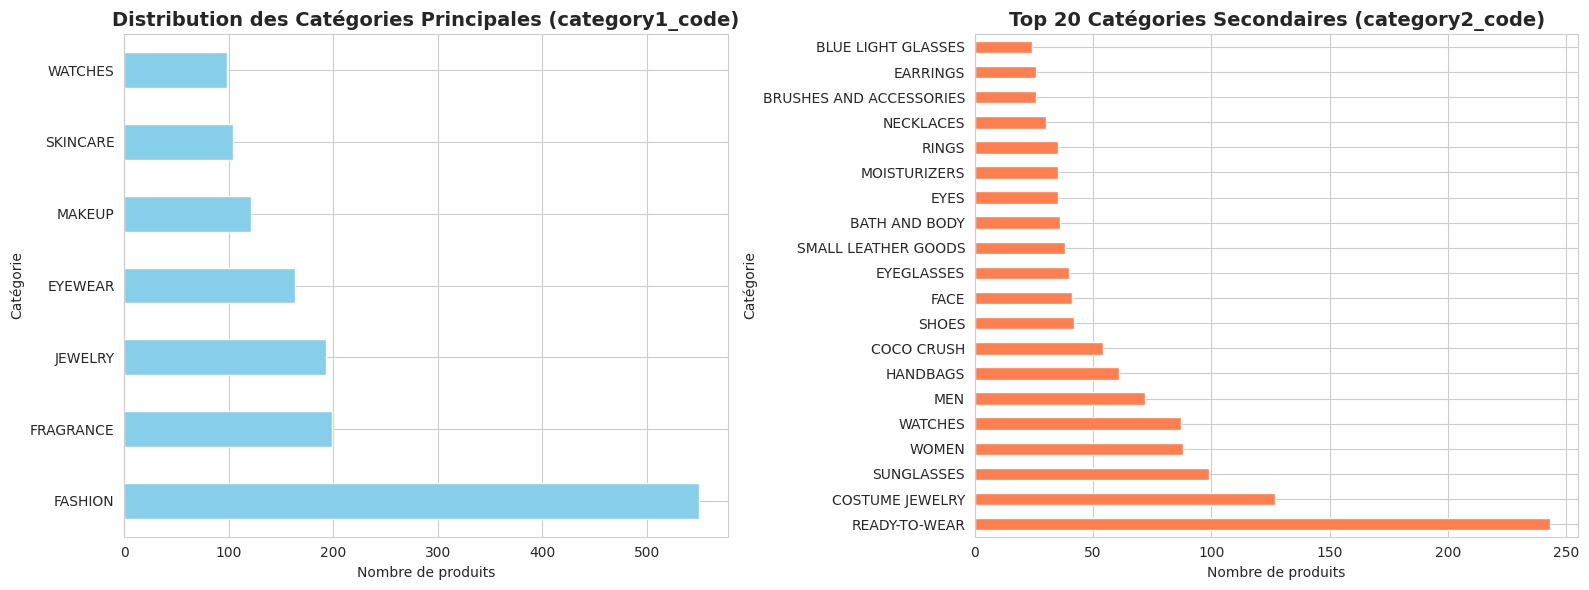

In [6]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("ANALYSE DE LA DISTRIBUTION DES CATÉGORIES")
# Catégories principales (category1_code)
print("\n Distribution des catégories principales (category1_code):")
cat1_dist = df_clean['category1_code'].value_counts()
print(cat1_dist)

# Catégories secondaires (category2_code)
print("\n Distribution des catégories secondaires (category2_code) - Top 20:")
cat2_dist = df_clean['category2_code'].value_counts().head(20)
print(cat2_dist)


          # Visualisation: Distribution des catégories principales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Catégories principales
cat1_dist.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Distribution des Catégories Principales (category1_code)',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nombre de produits')
axes[0].set_ylabel('Catégorie')

# Graphique 2: Top 10 catégories secondaires
cat2_dist.plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('Top 20 Catégories Secondaires (category2_code)',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nombre de produits')
axes[1].set_ylabel('Catégorie')

plt.tight_layout()
plt.show()

####   *PRIX*

ANALYSE DE LA DISTRIBUTION DES PRIX

 Statistiques des prix (EUR):
  - Prix minimum: 23.00 €
  - Prix maximum: 142000.00 €
  - Prix moyen: 6076.25 €
  - Prix médian: 1415.00 €
  - Écart-type: 15219.01 €

📊 Quartiles des prix:
0.25     195.0
0.50    1415.0
0.75    5800.0
Name: price_eur, dtype: float64


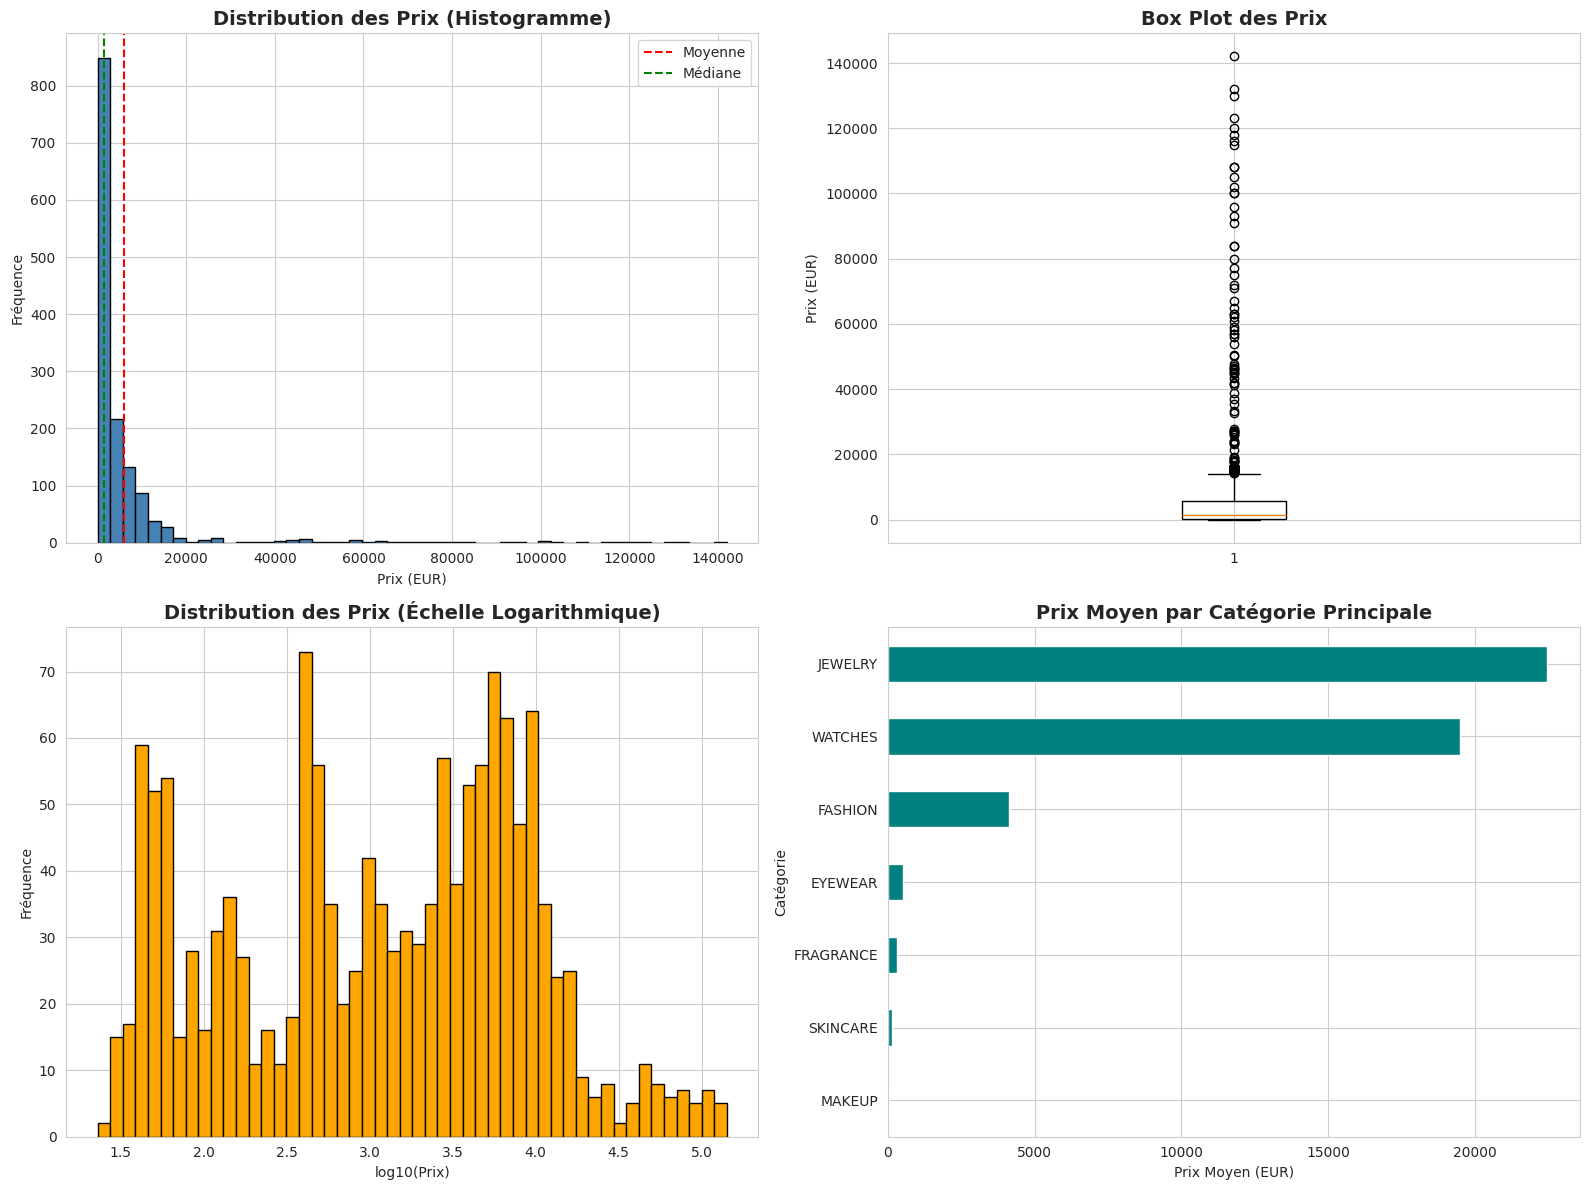

In [7]:

print("ANALYSE DE LA DISTRIBUTION DES PRIX")

# Statistiques des prix
print("\n Statistiques des prix (EUR):")
print(f"  - Prix minimum: {df_clean['price_eur'].min():.2f} €")
print(f"  - Prix maximum: {df_clean['price_eur'].max():.2f} €")
print(f"  - Prix moyen: {df_clean['price_eur'].mean():.2f} €")
print(f"  - Prix médian: {df_clean['price_eur'].median():.2f} €")
print(f"  - Écart-type: {df_clean['price_eur'].std():.2f} €")

# Quartiles
print("\n📊 Quartiles des prix:")
print(df_clean['price_eur'].quantile([0.25, 0.5, 0.75]))

# Visualisation de la distribution des prix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogramme
axes[0, 0].hist(df_clean['price_eur'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Distribution des Prix (Histogramme)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Prix (EUR)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].axvline(df_clean['price_eur'].mean(), color='red', linestyle='--', label='Moyenne')
axes[0, 0].axvline(df_clean['price_eur'].median(), color='green', linestyle='--', label='Médiane')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df_clean['price_eur'], vert=True)
axes[0, 1].set_title('Box Plot des Prix', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Prix (EUR)')

# Distribution logarithmique (pour mieux voir les valeurs extrêmes)
axes[1, 0].hist(np.log10(df_clean['price_eur']), bins=50, color='orange', edgecolor='black')
axes[1, 0].set_title('Distribution des Prix (Échelle Logarithmique)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('log10(Prix)')
axes[1, 0].set_ylabel('Fréquence')

# Prix par catégorie principale
cat1_prices = df_clean.groupby('category1_code')['price_eur'].mean().sort_values()
cat1_prices.plot(kind='barh', ax=axes[1, 1], color='teal')
axes[1, 1].set_title('Prix Moyen par Catégorie Principale', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Prix Moyen (EUR)')
axes[1, 1].set_ylabel('Catégorie')

plt.tight_layout()
plt.show()

#### *TEXTUELLES*

ANALYSE DES DESCRIPTIONS TEXTUELLES

 Statistiques des descriptions:
  - Longueur moyenne: 39.06 caractères
  - Longueur médiane: 36 caractères
  - Nombre moyen de mots: 5.09
  - Description la plus courte: 4 caractères
  - Description la plus longue: 162 caractères


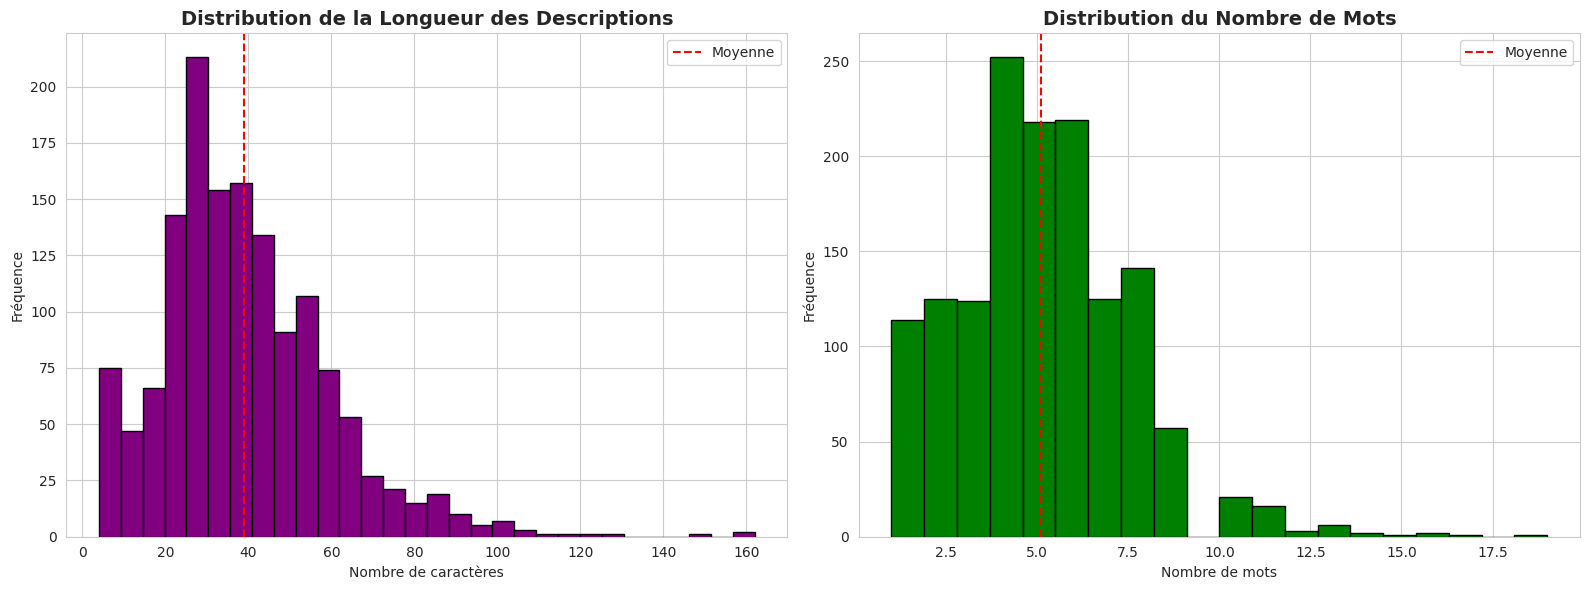


 Génération du nuage de mots...


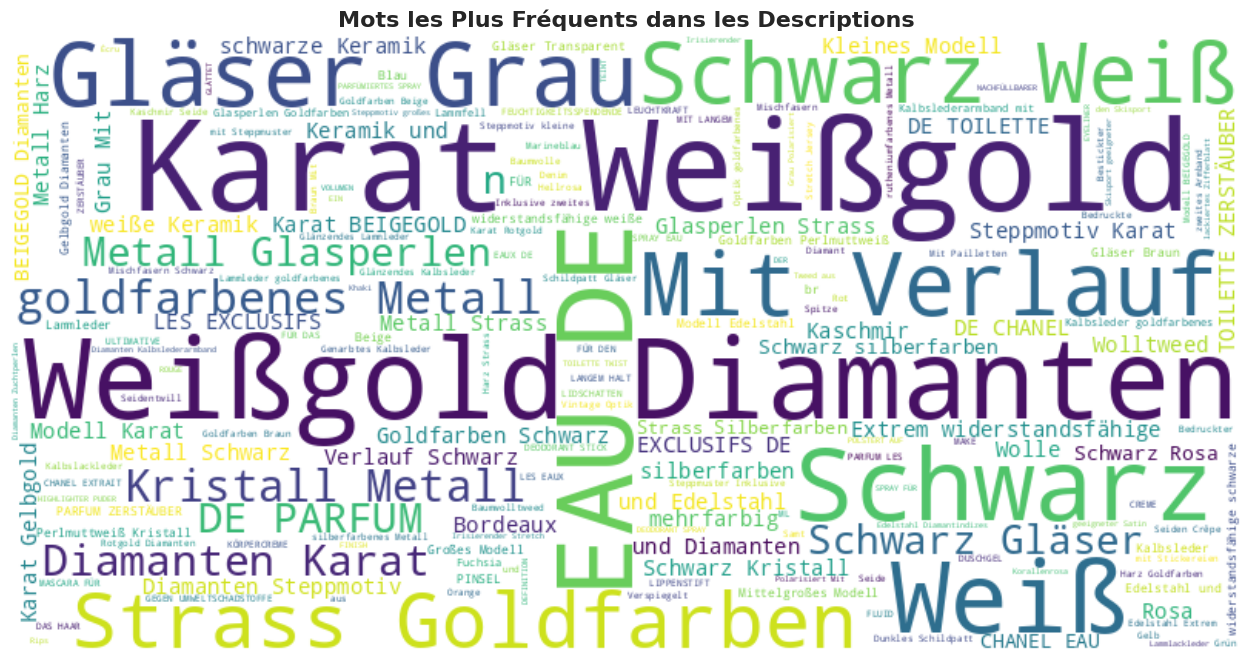

In [8]:
from wordcloud import WordCloud
print("ANALYSE DES DESCRIPTIONS TEXTUELLES")

# Longueur des descriptions
df_clean['title_length'] = df_clean['title'].str.len()
df_clean['title_words'] = df_clean['title'].str.split().str.len()

print("\n Statistiques des descriptions:")
print(f"  - Longueur moyenne: {df_clean['title_length'].mean():.2f} caractères")
print(f"  - Longueur médiane: {df_clean['title_length'].median():.0f} caractères")
print(f"  - Nombre moyen de mots: {df_clean['title_words'].mean():.2f}")
print(f"  - Description la plus courte: {df_clean['title_length'].min()} caractères")
print(f"  - Description la plus longue: {df_clean['title_length'].max()} caractères")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution de la longueur des descriptions
axes[0].hist(df_clean['title_length'], bins=30, color='purple', edgecolor='black')
axes[0].set_title('Distribution de la Longueur des Descriptions', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nombre de caractères')
axes[0].set_ylabel('Fréquence')
axes[0].axvline(df_clean['title_length'].mean(), color='red', linestyle='--', label='Moyenne')
axes[0].legend()

# Distribution du nombre de mots
axes[1].hist(df_clean['title_words'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribution du Nombre de Mots', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nombre de mots')
axes[1].set_ylabel('Fréquence')
axes[1].axvline(df_clean['title_words'].mean(), color='red', linestyle='--', label='Moyenne')
axes[1].legend()

plt.tight_layout()
plt.show()

# Mots les plus fréquents (Word Cloud)
print("\n Génération du nuage de mots...")
all_text = ' '.join(df_clean['title'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis').generate(all_text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots les Plus Fréquents dans les Descriptions', fontsize=16, fontweight='bold')
plt.show()

###Analyse des images

#### *QUALITÉ ET DIVERSITÉ DES IMAGES*

QUALITÉ ET DIVERSITÉ DES IMAGES

 Analyse d'un échantillon de 300 images...
  Progression: 20/300 images analysées...
  Progression: 40/300 images analysées...
  Progression: 60/300 images analysées...
  Progression: 80/300 images analysées...
  Progression: 100/300 images analysées...
  Progression: 120/300 images analysées...
  Progression: 140/300 images analysées...
  Progression: 160/300 images analysées...
  Progression: 180/300 images analysées...
  Progression: 200/300 images analysées...
  Progression: 220/300 images analysées...
  Progression: 240/300 images analysées...
  Progression: 260/300 images analysées...
  Progression: 280/300 images analysées...
  Progression: 300/300 images analysées...

 Statistiques des images:
  - Images analysées avec succès: 190

  Dimensions:
    • Largeur moyenne: 317 px
    • Hauteur moyenne: 356 px
    • Ratio d'aspect moyen: 0.94

  Modes d'image:
mode
RGB     137
P        52
RGBA      1
Name: count, dtype: int64

  Format d'image:
format

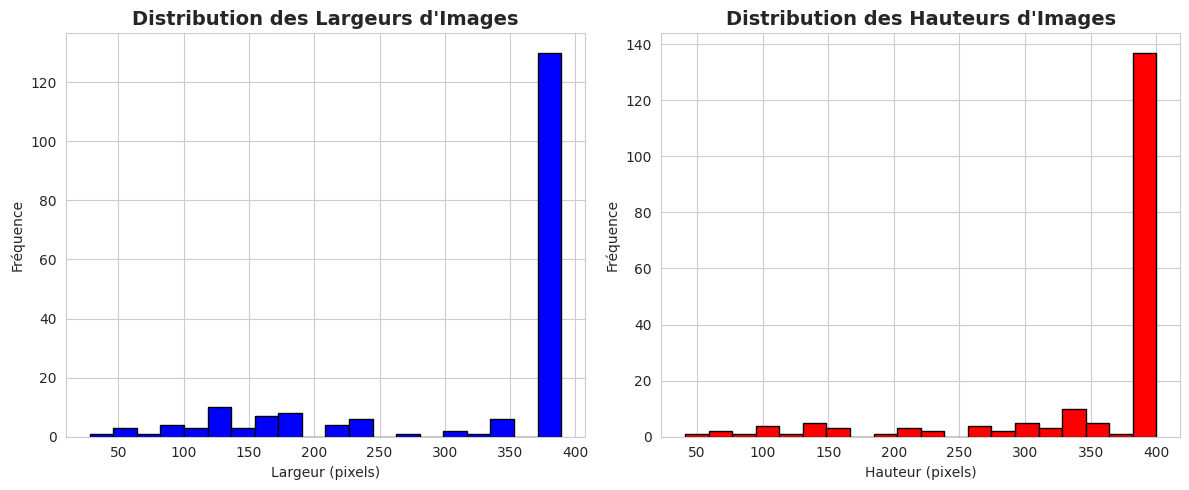

In [9]:
print("QUALITÉ ET DIVERSITÉ DES IMAGES")

def analyze_image(url):
    """Analyse une image depuis son URL"""
    try:
        response = requests.get(url, timeout=5)
        img = Image.open(BytesIO(response.content))

        # Informations de base
        width, height = img.size
        mode = img.mode
        format = img.format

        # Convertir en array numpy pour analyser les couleurs
        img_array = np.array(img)

        # Couleur dominante (moyenne)
        if len(img_array.shape) == 3:
            dominant_color = img_array.mean(axis=(0, 1))
        else:
            dominant_color = [img_array.mean()] * 3

        return {
            'width': width,
            'height': height,
            'mode': mode,
            'format': format,
            'aspect_ratio': width / height if height > 0 else 0,
            'dominant_r': dominant_color[0],
            'dominant_g': dominant_color[1] if len(dominant_color) > 1 else 0,
            'dominant_b': dominant_color[2] if len(dominant_color) > 2 else 0
        }
    except Exception as e:
        return None

# Analyser un échantillon d'images (les 300 premières )
print("\n Analyse d'un échantillon de 300 images...")
sample_images = df_clean.head(300)['imageurl'].tolist()
image_stats = []

for i, url in enumerate(sample_images):
    if (i + 1) % 20 == 0:
        print(f"  Progression: {i+1}/300 images analysées...")
    stats = analyze_image(url)
    if stats:
        image_stats.append(stats)

# Créer un DataFrame avec les statistiques
img_df = pd.DataFrame(image_stats)

print("\n Statistiques des images:")
print(f"  - Images analysées avec succès: {len(img_df)}")
print(f"\n  Dimensions:")
print(f"    • Largeur moyenne: {img_df['width'].mean():.0f} px")
print(f"    • Hauteur moyenne: {img_df['height'].mean():.0f} px")
print(f"    • Ratio d'aspect moyen: {img_df['aspect_ratio'].mean():.2f}")
print(f"\n  Modes d'image:")
print(img_df['mode'].value_counts())
print(f"\n  Format d'image:")
print(img_df['format'].value_counts())




# Visualisation
if len(img_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Distribution des largeurs
    axes[0].hist(img_df['width'], bins=20, color='blue', edgecolor='black')
    axes[0].set_title('Distribution des Largeurs d\'Images', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Largeur (pixels)')
    axes[0].set_ylabel('Fréquence')

    # Distribution des hauteurs
    axes[1].hist(img_df['height'], bins=20, color='red', edgecolor='black')
    axes[1].set_title('Distribution des Hauteurs d\'Images', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Hauteur (pixels)')
    axes[1].set_ylabel('Fréquence')

    plt.tight_layout()
    plt.show()



#### *IDENTIFICATION DES BIAIS POTENTIELS*

In [10]:
print("\n Analyse des biais potentiels:")

# 1. Surreprésentation de certaines catégories
print("\n Surreprésentation de catégories:")
cat_dist = df_clean['category2_code'].value_counts()
most_common = cat_dist.iloc[0]
least_common = cat_dist.iloc[-1]
ratio = most_common / least_common

print(f"   Catégorie la plus représentée: {cat_dist.index[0]} ({most_common} produits)")
print(f"   Catégorie la moins représentée: {cat_dist.index[-1]} ({least_common} produits)")
print(f"   Ratio max/min: {ratio:.2f}x")

if ratio > 10:
    print("   Déséquilibre important détecté!")

# 2. Produits avec descriptions similaires
print("\n Descriptions similaires/dupliquées:")
duplicate_titles = df_clean['title'].duplicated().sum()
print(f"  • Descriptions dupliquées: {duplicate_titles}")
print(f"  • Pourcentage: {(duplicate_titles/len(df_clean)*100):.2f}%")

# 3. Concentration des prix
print("\n Concentration des prix:")
price_ranges = pd.cut(df_clean['price_eur'], bins=[0, 100, 500, 1000, 5000, 50000, 150000])
price_dist = price_ranges.value_counts().sort_index()
print(price_dist)

# 4. Vérification des doublons
duplicates = df_clean.duplicated(subset=['product_code']).sum()
print(f"\n Doublons détectés :")
print(f"   - Produits dupliqués : {duplicates}")
if duplicates > 0:
    print("  -> Des doublons ont été détectés")
else:
    print("  -> Aucun doublon détecté")

# 5. Images potentiellement manquantes ou invalides
print("\n Qualité des URLs d'images:")
invalid_urls = df_clean['imageurl'].isna().sum()
print(f"   URLs manquantes: {invalid_urls}")



 Analyse des biais potentiels:

 Surreprésentation de catégories:
   Catégorie la plus représentée: READY-TO-WEAR (243 produits)
   Catégorie la moins représentée: BODY (1 produits)
   Ratio max/min: 243.00x
   Déséquilibre important détecté!

 Descriptions similaires/dupliquées:
  • Descriptions dupliquées: 604
  • Pourcentage: 42.30%

 Concentration des prix:
price_eur
(0, 100]           254
(100, 500]         275
(500, 1000]        118
(1000, 5000]       371
(5000, 50000]      372
(50000, 150000]     38
Name: count, dtype: int64

 Doublons détectés :
   - Produits dupliqués : 0
  -> Aucun doublon détecté

 Qualité des URLs d'images:
   URLs manquantes: 0


VISUALISATION D'EXEMPLES DE PRODUITS

 Affichage d'exemples de produits par catégorie...


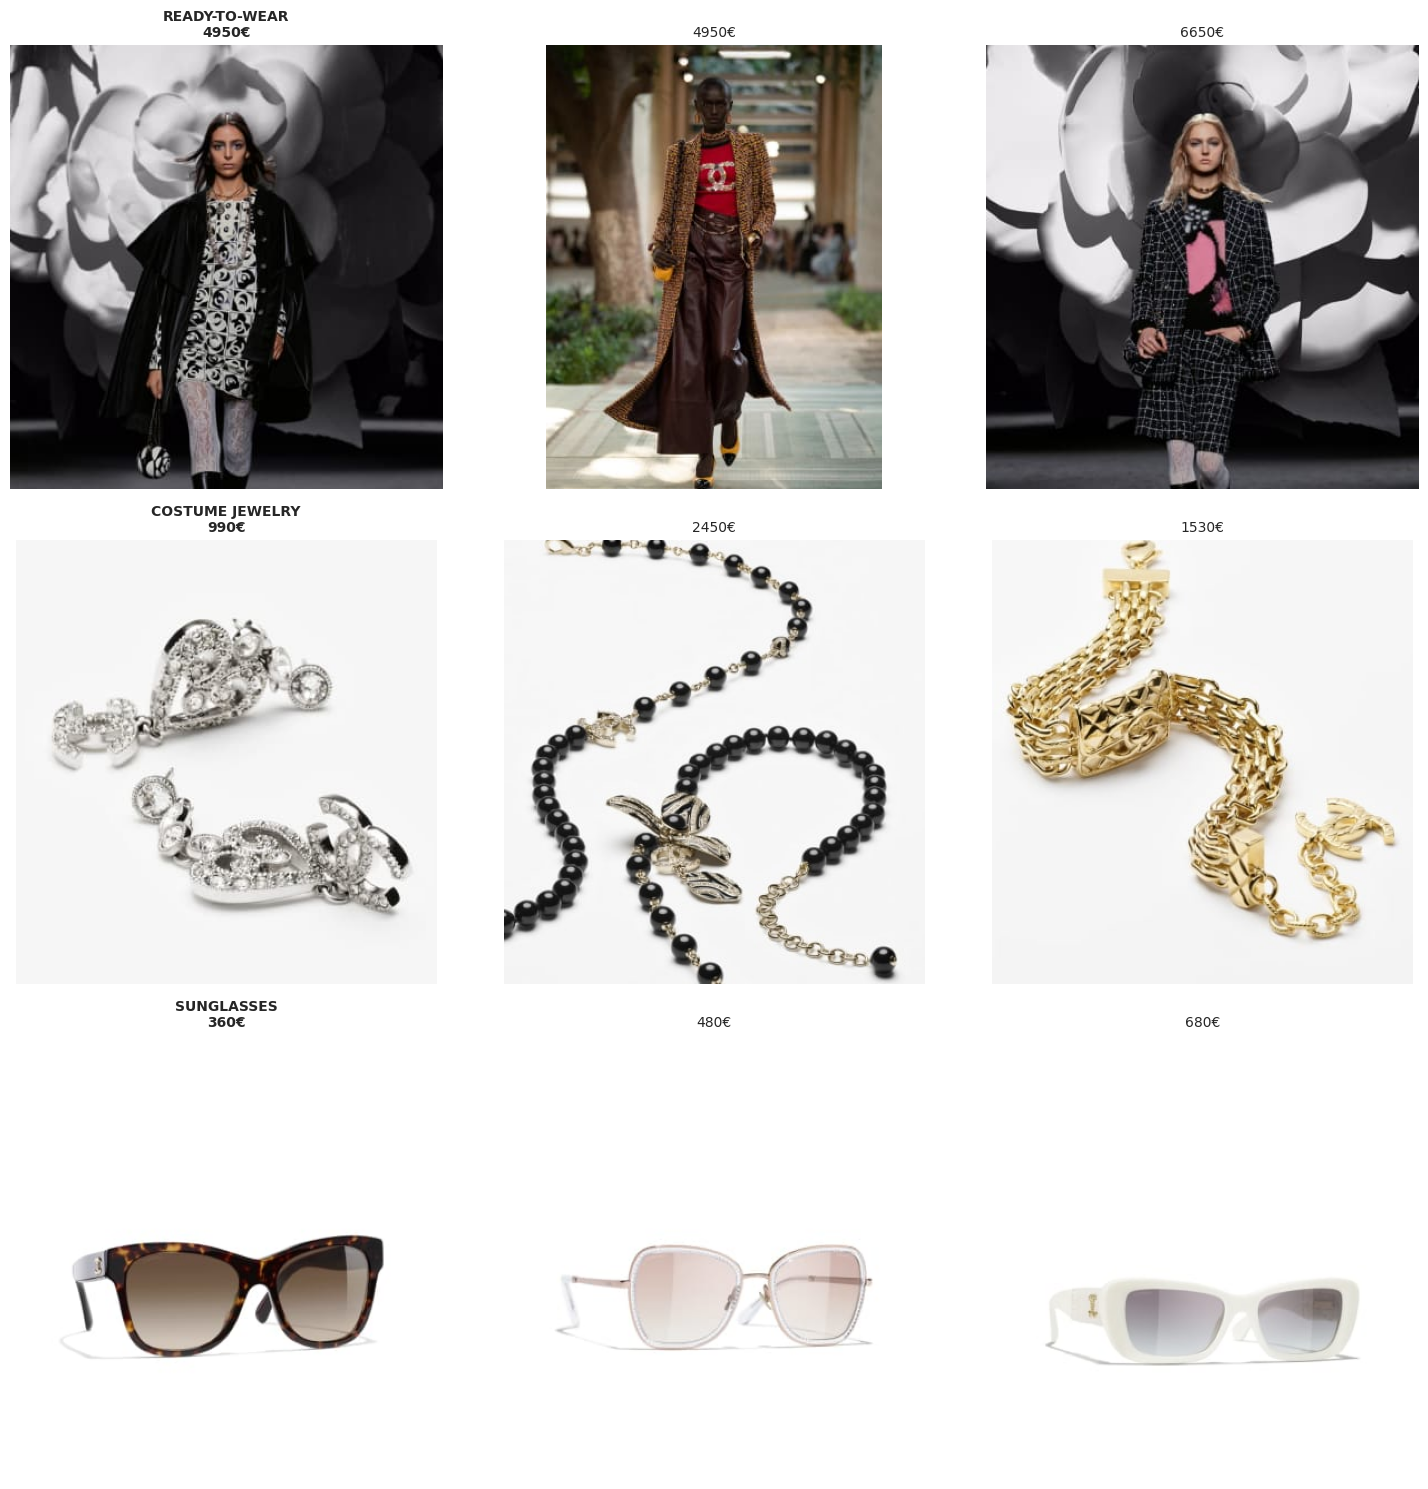


 Visualisation terminée!


In [11]:
print("VISUALISATION D'EXEMPLES DE PRODUITS")

def display_product_samples(df, n_categories=4, n_products=3):
    """Affiche des exemples de produits pour chaque catégorie"""

    top_categories = df['category2_code'].value_counts().head(n_categories).index

    fig, axes = plt.subplots(n_categories, n_products, figsize=(15, 5*n_categories))

    for i, category in enumerate(top_categories):
        category_products = df[df['category2_code'] == category].sample(n_products, random_state=42)

        for j, (idx, product) in enumerate(category_products.iterrows()):
            ax = axes[i, j] if n_categories > 1 else axes[j]

            try:
                response = requests.get(product['imageurl'], timeout=5)
                img = Image.open(BytesIO(response.content))
                ax.imshow(img)
                ax.axis('off')

                if j == 0:
                    ax.set_title(f"{category}\n{product['price_eur']:.0f}€",
                                fontsize=10, fontweight='bold')
                else:
                    ax.set_title(f"{product['price_eur']:.0f}€", fontsize=10)

            except:
                ax.text(0.5, 0.5, 'Image\nnon\ndisponible',
                       ha='center', va='center', fontsize=12)
                ax.axis('off')

    plt.tight_layout()
    plt.show()

print("\n Affichage d'exemples de produits par catégorie...")
display_product_samples(df_clean, n_categories=3, n_products=3)

print("\n Visualisation terminée!")

##***2. Préparation et nettoyage***

### Nettoyage du texte

In [12]:
import re
print("NETTOYAGE DES DESCRIPTIONS TEXTUELLES")


def clean_text(text):
    """Nettoie et normalise le texte"""
    if pd.isna(text) or text == 'n.a.':
        return ""

    # Conversion en minuscules
    text = text.lower()

    # Suppression des caractères spéciaux excessifs
    text = re.sub(r'[^\w\s\-&]', ' ', text)

    # Suppression des espaces multiples
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

print("\n Nettoyage des descriptions...")
df_clean['title_cleaned'] = df_clean['title'].apply(clean_text)

# Suppression des doublons exacts
n_before = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['product_code'])
n_after = len(df_clean)

print(f" Nettoyage terminé:")
print(f"   - Produits avant : {n_before}")
print(f"   - Produits après : {n_after}")
print(f"   - Doublons supprimés : {n_before - n_after}")

df_clean=df_clean.drop(columns=['title_length','title_words'])
show_dataset(df_clean)



NETTOYAGE DES DESCRIPTIONS TEXTUELLES

 Nettoyage des descriptions...
 Nettoyage terminé:
   - Produits avant : 1428
   - Produits après : 1428
   - Doublons supprimés : 0
Shape du dataset : (1428, 7)


,category1_code,category2_code,product_code,title,imageurl,price_eur,title_cleaned
0,FASHION,HANDBAGS,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,tweed & goldfarbenes metall schwarz rosa & bor...
1,FASHION,HANDBAGS,PA67085Y09953,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0,
2,EYEWEAR,BLUE LIGHT GLASSES,PA71441,Schwarz,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,schwarz
3,EYEWEAR,SUNGLASSES,PA71449,Silberfarben. Gläser: Braun Mit Verlauf,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0,silberfarben gläser braun mit verlauf
4,EYEWEAR,SUNGLASSES,PA71466,Blau & Rosa. Gläser: Grau Mit Verlauf,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0,blau & rosa gläser grau mit verlauf


### Prétraitement des images

In [13]:
import torch
from torchvision import transforms
print("PRÉTRAITEMENT DES IMAGES")

# Configuration du prétraitement
IMG_SIZE = 224
BATCH_SIZE = 32

# Transformations pour l'entraînement (avec augmentation)
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

# Transformations pour l'évaluation (sans augmentation)
eval_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

print(f"\n  Configuration du prétraitement :")
print(f"   - Taille des images : {IMG_SIZE}x{IMG_SIZE}")
print(f"   - Augmentation de données activée pour l'entraînement")
print(f"   - Normalisation selon ImageNet")

def load_and_preprocess_image(url, transform=eval_transforms):
    """Charge et prétraite une image depuis une URL"""
    try:
        response = requests.get(url, timeout=5)
        img = Image.open(BytesIO(response.content)).convert('RGB')
        return transform(img)
    except:
        return None

# Test sur quelques images
print(f"\n Test du prétraitement sur 20 images...")
test_urls = df_clean['imageurl'].sample(20, random_state=42)
success_count = 0

for i, url in enumerate(test_urls, 1):
    img_tensor = load_and_preprocess_image(url)
    if img_tensor is not None:
        success_count += 1
        print(f"    Image {i}/2 : Shape = {img_tensor.shape}")
    else:
        print(f"    Image {i}/20 : Échec du chargement")

print(f"\n Taux de succès : {success_count}/20 ({success_count/5*100:.0f}%)")



PRÉTRAITEMENT DES IMAGES

  Configuration du prétraitement :
   - Taille des images : 224x224
   - Augmentation de données activée pour l'entraînement
   - Normalisation selon ImageNet

 Test du prétraitement sur 20 images...
    Image 1/20 : Échec du chargement
    Image 2/20 : Échec du chargement
    Image 3/20 : Échec du chargement
    Image 4/2 : Shape = torch.Size([3, 224, 224])
    Image 5/20 : Échec du chargement
    Image 6/2 : Shape = torch.Size([3, 224, 224])
    Image 7/2 : Shape = torch.Size([3, 224, 224])
    Image 8/2 : Shape = torch.Size([3, 224, 224])
    Image 9/20 : Échec du chargement
    Image 10/20 : Échec du chargement
    Image 11/20 : Échec du chargement
    Image 12/2 : Shape = torch.Size([3, 224, 224])
    Image 13/2 : Shape = torch.Size([3, 224, 224])
    Image 14/2 : Shape = torch.Size([3, 224, 224])
    Image 15/20 : Échec du chargement
    Image 16/2 : Shape = torch.Size([3, 224, 224])
    Image 17/20 : Échec du chargement
    Image 18/2 : Shape = torch.Si

In [14]:
# Sauvegarde du dataset nettoyé
df_clean.to_csv('chanel_clean_dataset.csv', index=False)
print(f"\n Dataset nettoyé sauvegardé : 'chanel_clean_dataset.csv'")
gc.collect()


 Dataset nettoyé sauvegardé : 'chanel_clean_dataset.csv'


0

# ***Partie 2: Extraction et comparaison des descripteurs visuels***

## **Extraction des descripteurs visuel**

In [15]:
# Imports pour le traitement d'images
import cv2
from skimage.feature import local_binary_pattern, hog
from skimage.color import rgb2gray

# Imports pour le deep learning
import torch
import torch.nn as nn
from torchvision import models, transforms
from transformers import CLIPProcessor, CLIPModel, AutoTokenizer, AutoModel

# -----------------------------------------------------------------------------------
# Méthode Classique 1 : Local Binary Patterns (LBP)

print("MÉTHODE 1 : LOCAL BINARY PATTERNS (LBP)")

def lbpDescriptor_extract(image_url,n_points=24,radius=3):
    """Extrait le descripteur LBP d'une image"""
    try:
        response = requests.get(image_url, timeout=5)
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img_array = np.array(img.resize((224, 224)))

        # Conversion en niveaux de gris
        gray = rgb2gray(img_array)

        # Calcul du LBP
        lbp = local_binary_pattern(gray, n_points,radius, method='uniform')

        # Histogramme normalisé
        hist, _ = np.histogram(lbp.ravel(), bins=n_points + 2,
                              range=(0,n_points + 2))
        hist = hist.astype('float')
        hist /= (hist.sum() + 1e-7)

        return hist
    except:
        return None

print("\n Configuration LBP :")
print(f"   - Points : 24")
print(f"   - Rayon : 3")
print(f"   - Dimension du descripteur : 26")

# -----------------------------------------------------------------------------------
#  Méthode Deep Learning 1 : ResNet50 Pré-entraîné

# print("\n" + "-"*30)
# print("MÉTHODE 2 : RESNET50 PRÉ-ENTRAÎNÉ")

# Chargement du modèle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n Device utilisé : {device}")

resnet_model = models.resnet50(pretrained=True)
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1])  # Retirer la couche FC
resnet_model.eval()
resnet_model.to(device)

print(" Modèle ResNet50 chargé")

def extract_resnet_features(image_url):
    """Extrait les features ResNet d'une image"""
    try:
        img_tensor = load_and_preprocess_image(image_url)
        if img_tensor is None:
            return None

        with torch.no_grad():
            img_tensor = img_tensor.unsqueeze(0).to(device)
            features = resnet_model(img_tensor)
            features = features.squeeze().cpu().numpy()

        return features
    except:
        return None



# -----------------------------------------------------------------------------------
#  Méthode Deep Learning 2 : CLIP Vision
# print("\n" + "-"*30)
# print("MÉTHODE 3 : CLIP VISION ENCODER")

# Chargement du modèle CLIP
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model.to(device)
clip_model.eval()

print("Modèle CLIP chargé")

def extract_clip_features(image_url):
    """Extrait les features CLIP d'une image"""
    try:
        response = requests.get(image_url, timeout=5)
        img = Image.open(BytesIO(response.content)).convert('RGB')

        inputs = clip_processor(images=img, return_tensors="pt")
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            features = clip_model.get_image_features(**inputs)
            features = features.squeeze().cpu().numpy()

        return features
    except:
        return None



MÉTHODE 1 : LOCAL BINARY PATTERNS (LBP)

 Configuration LBP :
   - Points : 24
   - Rayon : 3
   - Dimension du descripteur : 26

 Device utilisé : cuda
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 94.6MB/s]


 Modèle ResNet50 chargé


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Modèle CLIP chargé


In [16]:
def extract_descriptors(sample_size,name):
# Extraction sur un échantillon
  print(f"\n Extraction des descripteurs {name} ")
  descriptors = []
  for idx, url in enumerate(df_clean['imageurl'].head(sample_size)):
      if name == 'LBP':
          desc = lbpDescriptor_extract(url)
      elif name == 'ResNet':
        desc = extract_resnet_features(url)
      else :
          desc = extract_clip_features(url)

      if desc is not None:
          descriptors.append(desc)
      if (idx + 1) % 20 == 0:
          print(f"    {idx + 1}/{sample_size} images traitées")

  descriptors = np.array(descriptors)
  print(f"\n Descripteurs {name} extraits : {descriptors.shape}")
  return descriptors

sample_size = min(400, len(df_clean))
lbp_descriptors=extract_descriptors(sample_size,'LBP')
resnet_descriptors= extract_descriptors(sample_size,'ResNet')
clip_descriptors=extract_descriptors(sample_size,'CLIP')


print(f"\n Sauvegarde des descripteurs sur disque...")

# Sauvegarder au format compressé
np.savez_compressed('image_lbp_descriptors.npz', descriptors=clip_descriptors)
np.savez_compressed('image_resnet_descriptors.npz', descriptors=clip_descriptors)
np.savez_compressed('image_clip_descriptors.npz', descriptors=clip_descriptors)

print(" Descripteurs sauvegardés :")
print("   - image_lbp_descriptors.npz")
print("   - image_resnet_descriptors.npz")
print("   - image_lclip_descriptors.npz")


 Extraction des descripteurs LBP 
    20/400 images traitées
    40/400 images traitées
    60/400 images traitées
    80/400 images traitées
    100/400 images traitées
    120/400 images traitées
    140/400 images traitées
    160/400 images traitées
    180/400 images traitées
    200/400 images traitées
    220/400 images traitées
    240/400 images traitées
    260/400 images traitées
    280/400 images traitées
    300/400 images traitées
    320/400 images traitées
    340/400 images traitées
    360/400 images traitées
    380/400 images traitées
    400/400 images traitées

 Descripteurs LBP extraits : (254, 26)

 Extraction des descripteurs ResNet 
    20/400 images traitées
    40/400 images traitées
    60/400 images traitées
    80/400 images traitées
    100/400 images traitées
    120/400 images traitées
    140/400 images traitées
    160/400 images traitées
    180/400 images traitées
    200/400 images traitées
    220/400 images traitées
    240/400 images traitées

## **Analyse Comparative des Méthodes Visuelles**

ANALYSE COMPARATIVE DES MÉTHODES VISUELLES

 Dimensions des descripteurs :
   - LBP          : (254, 26)
   - ResNet50     : (255, 2048)
   - CLIP Vision  : (255, 512)

 Analyse sur 254 échantillons valides...

 Distances moyennes intra-classe (plus petit = meilleur) :
   - LBP          : 0.2402
   - ResNet50     : 0.4047
   - CLIP Vision  : 0.3601

------------------------------
VISUALISATION DES EMBEDDINGS (t-SNE)

 Réduction de dimensionnalité en cours...
    t-SNE pour LBP...
    t-SNE pour ResNet50...
  t-SNE pour CLIP...


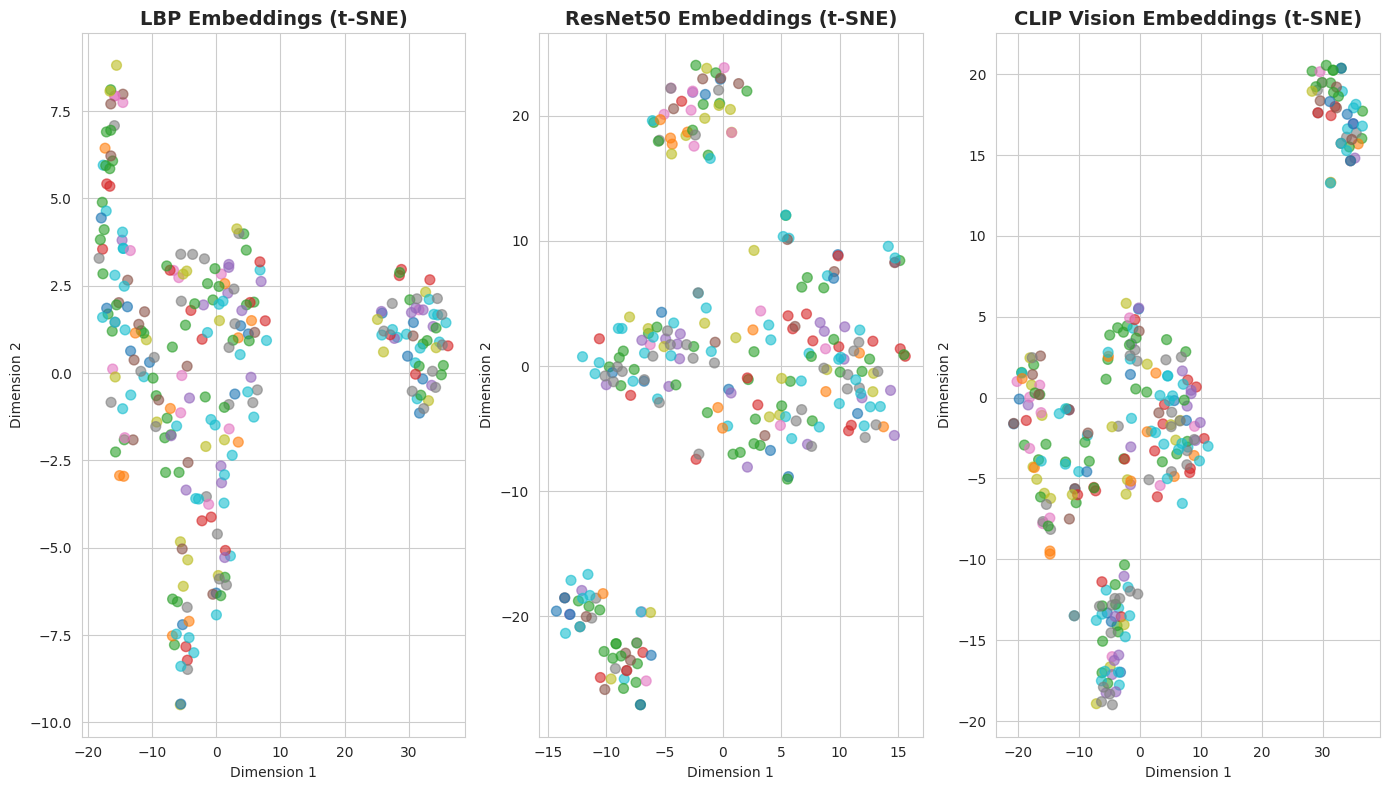


 Visualisations générées


8451

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

print("ANALYSE COMPARATIVE DES MÉTHODES VISUELLES")

# Récapitulatif des dimensions
print(f"\n Dimensions des descripteurs :")
print(f"   - LBP          : {lbp_descriptors.shape}")
print(f"   - ResNet50     : {resnet_descriptors.shape}")
print(f"   - CLIP Vision  : {clip_descriptors.shape}")

# Calcul des distances intra-classe
def compute_intraclass_distances(descriptors, labels, n_samples=20):
    """Calcule les distances moyennes intra-classe"""
    distances = []
    unique_labels = np.unique(labels)[:10]  # Top 5 catégories

    for label in unique_labels:
        idx = np.where(labels == label)[0]
        if len(idx) >= 2:
            sample_idx = np.random.choice(idx, min(n_samples, len(idx)), replace=False)
            sample_desc = descriptors[sample_idx]

            # Distances cosinus
            sim_matrix = cosine_similarity(sample_desc)
            # Moyenne des distances (hors diagonale)
            mask = ~np.eye(sim_matrix.shape[0], dtype=bool)
            mean_dist = 1 - sim_matrix[mask].mean()
            distances.append(mean_dist)

    return np.mean(distances)

# Préparation des labels
sample_df = df_clean.head(sample_size).reset_index(drop=True)
labels = sample_df['category2_code'].values

# On ne garde que les indices où tous les descripteurs sont présents
valid_idx = []
for i in range(len(labels)):
    if (i < len(lbp_descriptors) and i < len(resnet_descriptors) and i < len(clip_descriptors)):
        valid_idx.append(i)

valid_idx = np.array(valid_idx)
labels = labels[valid_idx]

print(f"\n Analyse sur {len(valid_idx)} échantillons valides...")

# Calcul des distances moyennes intra-classe
print(f"\n Distances moyennes intra-classe (plus petit = meilleur) :")
lbp_dist = compute_intraclass_distances(lbp_descriptors[valid_idx], labels)
print(f"   - LBP          : {lbp_dist:.4f}")

resnet_dist = compute_intraclass_distances(resnet_descriptors[valid_idx], labels)
print(f"   - ResNet50     : {resnet_dist:.4f}")

clip_dist = compute_intraclass_distances(clip_descriptors[valid_idx], labels)
print(f"   - CLIP Vision  : {clip_dist:.4f}")

# -----------------------------------------------------------------------------------
# Visualisation avec t-SNE

print("\n" + "-"*30)
print("VISUALISATION DES EMBEDDINGS (t-SNE)")

from sklearn.preprocessing import LabelEncoder

# Encodage des labels pour la visualisation
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Réduction de dimensionnalité avec t-SNE
print("\n Réduction de dimensionnalité en cours...")

fig, axes = plt.subplots(1, 3, figsize=(14, 8))

# LBP
print("    t-SNE pour LBP...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(valid_idx)-1))
lbp_2d = tsne.fit_transform(lbp_descriptors[valid_idx])
scatter = axes[0].scatter(lbp_2d[:, 0], lbp_2d[:, 1], c=labels_encoded,
                            cmap='tab10', alpha=0.6, s=50)
axes[0].set_title('LBP Embeddings (t-SNE)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')

# ResNet50
print("    t-SNE pour ResNet50...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(valid_idx)-1))
resnet_2d = tsne.fit_transform(resnet_descriptors[valid_idx])
axes[1].scatter(resnet_2d[:, 0], resnet_2d[:, 1], c=labels_encoded,
                   cmap='tab10', alpha=0.6, s=50)
axes[1].set_title('ResNet50 Embeddings (t-SNE)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')

# CLIP
print("  t-SNE pour CLIP...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(valid_idx)-1))
clip_2d = tsne.fit_transform(clip_descriptors[valid_idx])
axes[2].scatter(clip_2d[:, 0], clip_2d[:, 1], c=labels_encoded,
                   cmap='tab10', alpha=0.6, s=50)
axes[2].set_title('CLIP Vision Embeddings (t-SNE)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Dimension 1')
axes[2].set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()

print("\n Visualisations générées")
gc.collect()


# ***Partie 3 :Extraction et comparaison des descripteurs textuels***

##***Extraction descripteurs textuels***

In [18]:
print("-"*20)
print("CONFIGURATION ET GESTION DE LA MÉMOIRE")

import gc
import psutil
from typing import List, Optional

def print_memory_usage():
    """Affiche l'utilisation de la mémoire"""
    process = psutil.Process()
    mem_info = process.memory_info()
    mem_usage_mb = mem_info.rss / 1024 / 1024

    if torch.cuda.is_available():
        gpu_mem_allocated = torch.cuda.memory_allocated() / 1024 / 1024
        gpu_mem_reserved = torch.cuda.memory_reserved() / 1024 / 1024
        print(f"   RAM : {mem_usage_mb:.1f} MB")
        print(f"  GPU Allocated : {gpu_mem_allocated:.1f} MB")
        print(f"  GPU Reserved : {gpu_mem_reserved:.1f} MB")
    else:
        print(f" RAM : {mem_usage_mb:.1f} MB")

def clear_memory():
    """Libère la mémoire"""
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

# Configuration du traitement par lots
BATCH_SIZE = 32  # Taille des lots pour le traitement
MAX_TEXT_LENGTH = 128  # Longueur maximale des textes

print(f"\n  Configuration :")
print(f"   - Taille des lots (batch) : {BATCH_SIZE}")
print(f"   - Longueur max des textes : {MAX_TEXT_LENGTH}")
print(f"   - Device : {device}")

print(f"\n État initial de la mémoire :")
print_memory_usage()
sample_df = df_clean.head(sample_size).reset_index(drop=True)
# Extraction des textes nettoyés
texts = sample_df['title_cleaned'].values
print(f"\n Nombre de textes à traiter : {len(texts)}")


--------------------
CONFIGURATION ET GESTION DE LA MÉMOIRE

  Configuration :
   - Taille des lots (batch) : 32
   - Longueur max des textes : 128
   - Device : cuda

 État initial de la mémoire :
   RAM : 2129.4 MB
  GPU Allocated : 678.6 MB
  GPU Reserved : 756.0 MB

 Nombre de textes à traiter : 400


In [19]:
! pip install gensim
! pip install nltk
! pip install transformers

# -----------------------------------------------------------------------------------
#  Méthode Classique 1 : TF-IDF

print("MÉTHODE 1 : TF-IDF (Term Frequency-Inverse Document Frequency)")

# Extraction des textes nettoyés
texts = sample_df['title_cleaned'].values

print(f"\n Configuration TF-IDF :")
print(f"   - Max features : 1000")
print(f"   - Min document frequency : 2")
print(f"   - N-grams : (1, 2)")

# Initialisation du vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    min_df=2,
    ngram_range=(1, 2),
    lowercase=True,
    dtype=np.float32
)

# -----------------------------------------------------------------------------------
#  Méthode Classique 2 : GloVe Embeddings
print("\n" + "-"*20)
print("MÉTHODE 2 : GLOVE EMBEDDINGS")

import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
from nltk.tokenize import word_tokenize
import nltk


# print(f"   - Dimensions : 100")
# glove_model = api.load("glove-wiki-gigaword-100")

# Télécharger les ressources NLTK si nécessaire
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

print(f"\n Configuration GloVe :")
print(f"   - Modèle : glove-wiki-gigaword-300")
print(f"   - Dimensions : 300")

# Charger les embeddings GloVe
print(f"\n Chargement des embeddings GloVe...")
try:
    glove_model = api.load("glove-wiki-gigaword-300")
    print(f" Modèle GloVe chargé : {len(glove_model)} mots, {glove_model.vector_size} dimensions")
except:
    print(" Impossible de charger GloVe, utilisation de zéros")
    glove_model = None

print(f"\n Mémoire après chargement GloVe :")
print_memory_usage()

def extract_glove_features_batch(texts_batch: List[str]) -> np.ndarray:
    """
    Extrait les features GloVe pour un batch de textes

    Args:
        texts_batch: Liste de textes

    Returns:
        Array numpy des embeddings moyens
    """
    embeddings = []

    for text in texts_batch:
        words = text.split()
        word_vectors = []

        for word in words:
            try:
                word_vectors.append(glove_model[word])
            except KeyError:
                continue  # Ignorer les mots hors vocabulaire

        if word_vectors:
            # Moyenne des word embeddings
            embedding = np.mean(word_vectors, axis=0)
        else:
            # Vecteur zéro si aucun mot trouvé
            embedding = np.zeros(glove_model.vector_size)

        embeddings.append(embedding)

    return np.array(embeddings, dtype=np.float32)


# -----------------------------------------------------------------------------------
# Méthode Avancée : DistilBERT Embeddings
print("\n" + "-"*20)
print("MÉTHODE 3 : DISTILBERT EMBEDDINGS")

from transformers import DistilBertTokenizer, DistilBertModel
import torch

# Chargement du modèle DistilBERT
print(f"\n Configuration DistilBERT :")
print(f"   - Modèle : distilbert-base-uncased")
print(f"   - Context length : 128 tokens")
print(f"   - Traitement : Par lots de {BATCH_SIZE}")
print(f"   - Max length : {MAX_TEXT_LENGTH}")

distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Vérifier si GPU est disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
distilbert_model.to(device)
distilbert_model.eval()

print(f" Modèle DistilBERT chargé sur {device}")

def extract_distilbert_features_batch(texts_batch: List[str],
                                     tokenizer,
                                     model,
                                     max_length: int = 128) -> Optional[np.ndarray]:
    """
    Extrait les features DistilBERT pour un batch de textes

    """
    try:
        # Tokenization du batch
        inputs = tokenizer(
            texts_batch,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )

        # Déplacer sur le device
        inputs = {k: v.to(device) for k, v in inputs.items()}

        # Extraction sans calcul de gradients
        with torch.no_grad():
            outputs = model(**inputs)
            # Utilisation du token [CLS] (première position)
            embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

        return embeddings.astype(np.float32)

    except Exception as e:
        print(f"     Erreur dans le batch : {e}")
        return None


gc.collect()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 26.1 MB/s eta 0:00:00
MÉTHODE 1 : TF-IDF (Term Frequency-Inverse Document Frequency)

 Configuration TF-IDF :
   - Max features : 1000
   - Min document frequency : 2
   - N-grams : (1, 2)

--------------------
MÉTHODE 2 : GLOVE EMBEDDINGS


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



 Configuration GloVe :
   - Modèle : glove-wiki-gigaword-300
   - Dimensions : 300

 Chargement des embeddings GloVe...
[==================================================] 100.0% 376.1/376.1MB downloaded
 Modèle GloVe chargé : 400000 mots, 300 dimensions

 Mémoire après chargement GloVe :
   RAM : 2702.8 MB
  GPU Allocated : 678.6 MB
  GPU Reserved : 756.0 MB

--------------------
MÉTHODE 3 : DISTILBERT EMBEDDINGS

 Configuration DistilBERT :
   - Modèle : distilbert-base-uncased
   - Context length : 128 tokens
   - Traitement : Par lots de 32
   - Max length : 128


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

 Modèle DistilBERT chargé sur cuda


60

In [20]:
# Transformation
print(f"\n Extraction des descripteurs TF-IDF...")
tfidf_descriptors = tfidf_vectorizer.fit_transform(texts)
# tfidf_descriptors = tfidf_descriptors.toarray()
tfidf_descriptors = tfidf_descriptors.toarray().astype(np.float32)
print(f" Descripteurs TF-IDF extraits : {tfidf_descriptors.shape}")
print(f"   - Vocabulaire : {len(tfidf_vectorizer.vocabulary_)} termes")

# Top termes
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\n Top 20 termes par importance TF-IDF :")
tfidf_scores = tfidf_descriptors.mean(axis=0)
top_indices = tfidf_scores.argsort()[-20:][::-1]
for i, idx in enumerate(top_indices, 1):
    print(f"   {i:2d}. {feature_names[idx]:20s} : {tfidf_scores[idx]:.4f}")

#-----------------------------------------------

# Extraction par lots
print(f"\n Extraction des descripteurs GloVe (traitement par lots)...")
glove_descriptors = []
n_batches = (len(texts) + BATCH_SIZE - 1) // BATCH_SIZE

for i in range(n_batches):
    start_idx = i * BATCH_SIZE
    end_idx = min((i + 1) * BATCH_SIZE, len(texts))
    batch_texts = texts[start_idx:end_idx]

    batch_embeddings = extract_glove_features_batch(batch_texts)
    glove_descriptors.append(batch_embeddings)

    if (i + 1) % 10 == 0 or (i + 1) == n_batches:
        print(f"    Batch {i + 1}/{n_batches} traité ({end_idx}/{len(texts)} textes)")

    # Libérer la mémoire périodiquement
    if (i + 1) % 20 == 0:
        clear_memory()

glove_descriptors = np.vstack(glove_descriptors)
print(f"\n Descripteurs GloVe extraits : {glove_descriptors.shape}")

# Statistiques de couverture du vocabulaire
def compute_vocab_coverage(texts_list, model):
    """Calcule la couverture du vocabulaire"""
    total_words = 0
    found_words = 0

    for text in texts_list:
        words = text.split()
        for word in words:
            total_words += 1
            if word in model:
                found_words += 1

    return (found_words / total_words * 100) if total_words > 0 else 0

coverage = compute_vocab_coverage(texts[:100], glove_model)  # Sur un échantillon
print(f"   - Couverture vocabulaire : {coverage:.1f}%")


# Libérer le modèle GloVe pour économiser la mémoire
del glove_model
clear_memory()
print("   Modèle GloVe libéré de la mémoire")

#-----------------------------------------------------
# Extraction par lots avec gestion de la mémoire
print(f"\n Extraction des descripteurs DistilBERT (traitement par lots)...")
distilbert_descriptors = []
n_batches = (len(texts) + BATCH_SIZE - 1) // BATCH_SIZE

for i in range(n_batches):
    start_idx = i * BATCH_SIZE
    end_idx = min((i + 1) * BATCH_SIZE, len(texts))
    batch_texts = texts[start_idx:end_idx].tolist()

    # Extraction
    batch_embeddings = extract_distilbert_features_batch(
        batch_texts,
        distilbert_tokenizer,
        distilbert_model,
        max_length=MAX_TEXT_LENGTH
    )

    if batch_embeddings is not None:
        distilbert_descriptors.append(batch_embeddings)

    if (i + 1) % 5 == 0 or (i + 1) == n_batches:
        print(f"   ✓ Batch {i + 1}/{n_batches} traité ({end_idx}/{len(texts)} textes)")
        print(f"      RAM: {psutil.Process().memory_info().rss / 1024 / 1024:.0f} MB")

    # Libérer la mémoire GPU régulièrement
    if (i + 1) % 10 == 0:
        clear_memory()

distilbert_descriptors = np.vstack(distilbert_descriptors)
print(f"\n Descripteurs DistilBERT extraits : {distilbert_descriptors.shape}")

print(f"\n Mémoire après extraction DistilBERT :")
print_memory_usage()

# Libérer le modèle DistilBERT
del distilbert_model
del distilbert_tokenizer
clear_memory()
print("    Modèle DistilBERT libéré de la mémoire")

print(f"\n Sauvegarde des descripteurs...")

# Sauvegarder au format compressé
np.savez_compressed('text_descriptors_tfidf.npz', descriptors=tfidf_descriptors)
np.savez_compressed('text_descriptors_glove.npz', descriptors=glove_descriptors)
np.savez_compressed('text_descriptors_distilbert.npz', descriptors=distilbert_descriptors)

print(" Descripteurs sauvegardés :")
print("   - text_descriptors_tfidf.npz")
print("   - text_descriptors_glove.npz")
print("   - text_descriptors_distilbert.npz")


gc.collect()


 Extraction des descripteurs TF-IDF...
 Descripteurs TF-IDF extraits : (400, 349)
   - Vocabulaire : 349 termes

 Top 20 termes par importance TF-IDF :
    1. schwarz              : 0.0759
    2. 18                   : 0.0476
    3. karat                : 0.0476
    4. 18 karat             : 0.0476
    5. metall               : 0.0462
    6. diamanten            : 0.0439
    7. karat weißgold       : 0.0370
    8. weißgold             : 0.0370
    9. goldfarben           : 0.0356
   10. weißgold diamanten   : 0.0338
   11. weiß                 : 0.0295
   12. gläser               : 0.0288
   13. strass               : 0.0268
   14. und                  : 0.0256
   15. kristall             : 0.0246
   16. mit                  : 0.0229
   17. de                   : 0.0225
   18. goldfarbenes         : 0.0207
   19. goldfarbenes metall  : 0.0207
   20. schwarz weiß         : 0.0197

 Extraction des descripteurs GloVe (traitement par lots)...
    Batch 10/13 traité (320/400 textes)
    Ba

0

##  **Analyse Comparative des Méthodes Textuelles**

ANALYSE COMPARATIVE DES MÉTHODES TEXTUELLES

 Dimensions des descripteurs :
   - TF-IDF        : (400, 349)
   - GloVe         : (400, 300)
   - DistilBERT    : (400, 768)

 Analyse de la similarité sémantique...

 Exemples analysés :
   1. [HANDBAGS] tweed & goldfarbenes metall schwarz rosa & bordeaux...
   2. [COCO CRUSH] steppmotiv großes modell 18 karat gelbgold...
   3. [HANDBAGS] samt emaille & goldfarbenes metall schwarz...
   4. [EYEGLASSES] schwarz...
   5. [COSTUME JEWELRY] metall lammleder & strass goldfarben schwarz & kristall...

 Matrices de similarité (plus proche de 1 = plus similaire) :


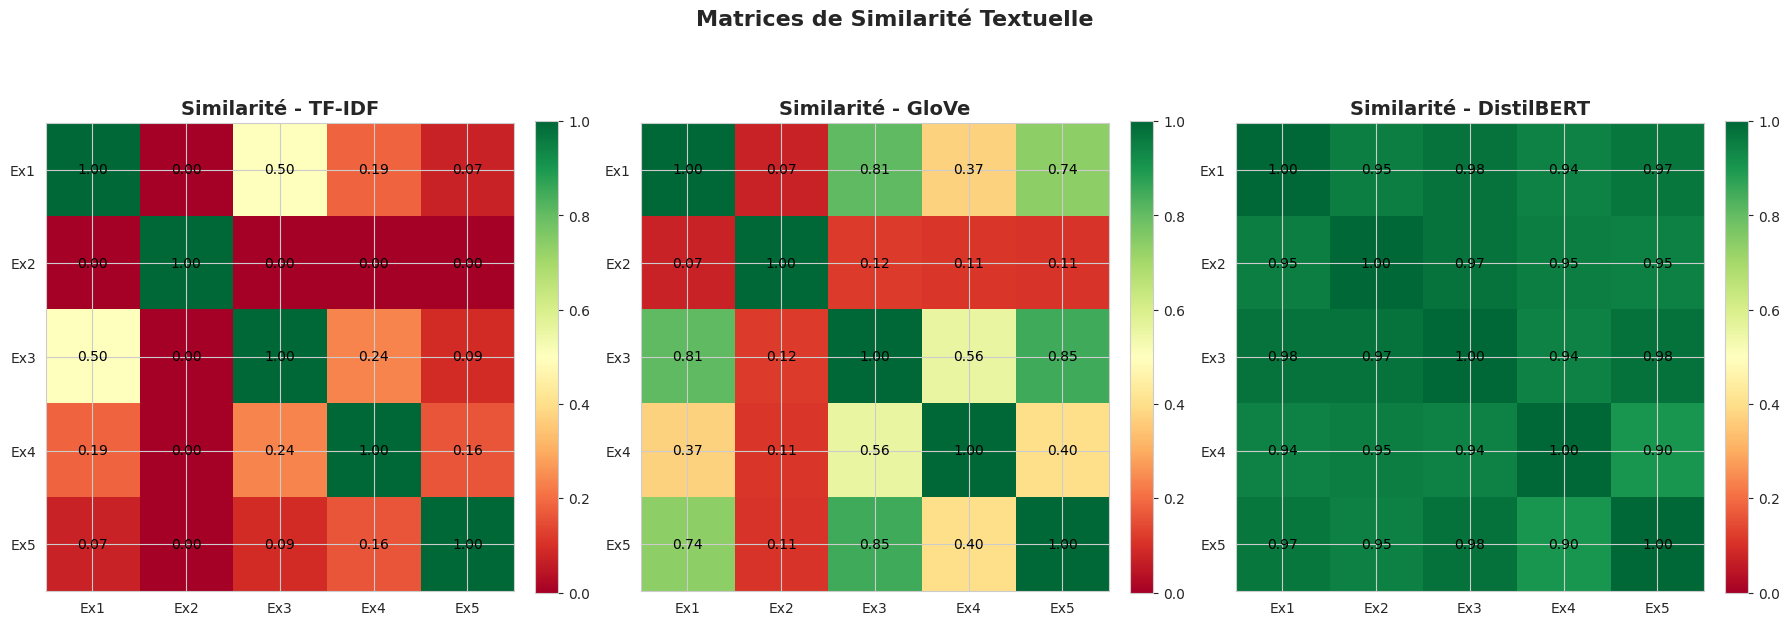


------------------------------
VISUALISATION DES EMBEDDINGS TEXTUELS (t-SNE)

 Réduction de dimensionnalité en cours...
    t-SNE pour TF-IDF...
    t-SNE pour GloVe...
    t-SNE pour DistilBERT...


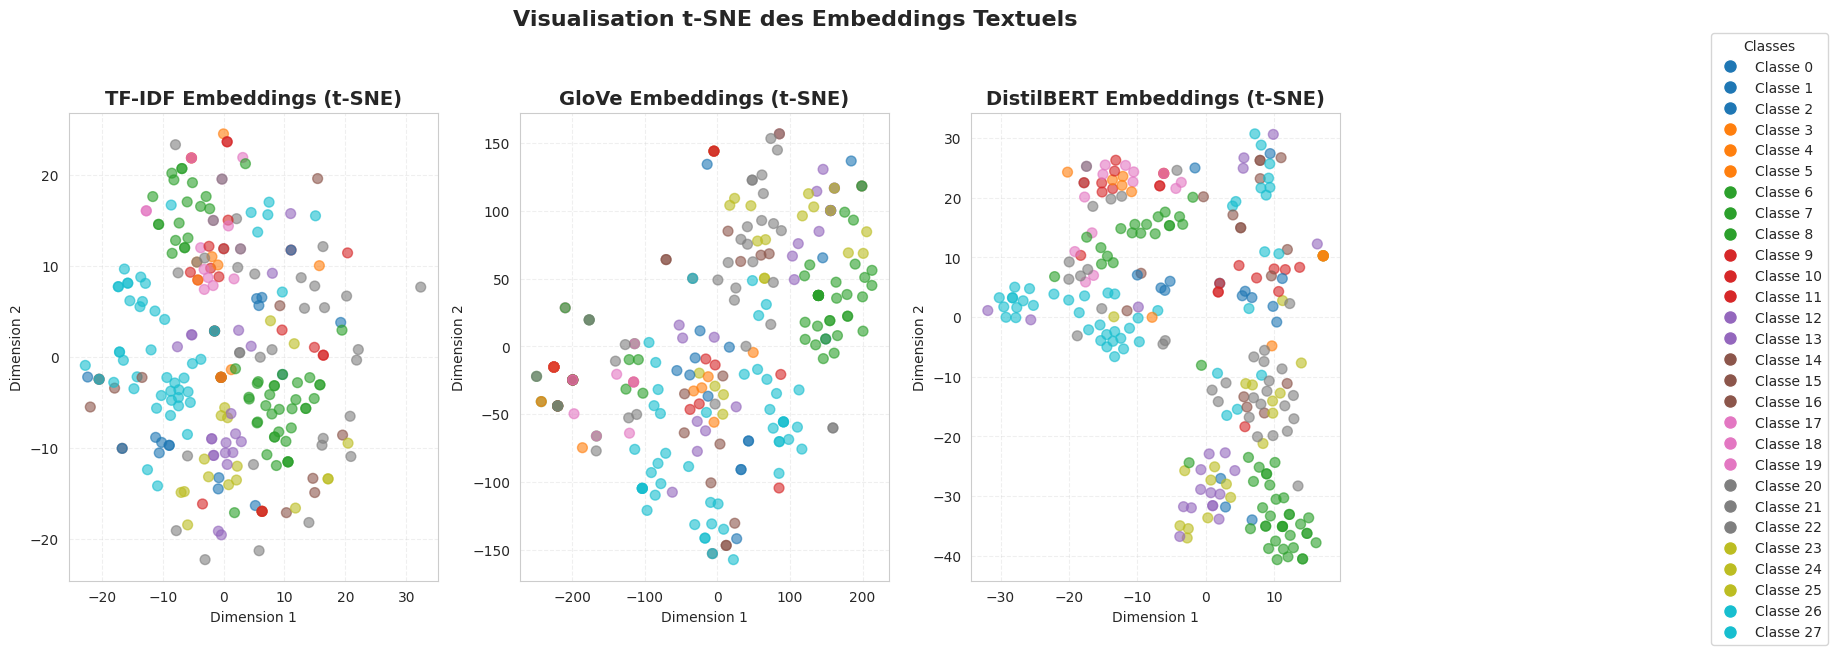

In [21]:

print("ANALYSE COMPARATIVE DES MÉTHODES TEXTUELLES")


# Récapitulatif des dimensions
print(f"\n Dimensions des descripteurs :")
print(f"   - TF-IDF        : {tfidf_descriptors.shape}")
print(f"   - GloVe         : {glove_descriptors.shape}")
print(f"   - DistilBERT    : {distilbert_descriptors.shape}")

# Calcul de la similarité sémantique
from sklearn.metrics.pairwise import cosine_similarity
print(f"\n Analyse de la similarité sémantique...")

# Sélection de quelques exemples
example_indices = [0, 10, 20, 30, 40]
example_texts = [texts[i] for i in example_indices]
example_labels = [labels[i] for i in example_indices]

print(f"\n Exemples analysés :")
for i, (text, label) in enumerate(zip(example_texts, example_labels)):
    print(f"   {i+1}. [{label}] {text[:60]}...")

# Fonction pour calculer les similarités
def compute_similarity_matrix(descriptors, indices):
    """Calcule la matrice de similarité pour des indices donnés"""
    subset = descriptors[indices]
    return cosine_similarity(subset)

# Comparaison des matrices de similarité
print(f"\n Matrices de similarité (plus proche de 1 = plus similaire) :")

methods = {
    'TF-IDF': tfidf_descriptors,
    'GloVe': glove_descriptors,
    'DistilBERT': distilbert_descriptors
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (method_name, descriptors) in enumerate(methods.items()):
    sim_matrix = compute_similarity_matrix(descriptors, example_indices)

    im = axes[idx].imshow(sim_matrix, cmap='RdYlGn', vmin=0, vmax=1)
    axes[idx].set_title(f'Similarité - {method_name}',
                       fontsize=14, fontweight='bold')
    axes[idx].set_xticks(range(len(example_indices)))
    axes[idx].set_yticks(range(len(example_indices)))
    axes[idx].set_xticklabels([f'Ex{i+1}' for i in range(len(example_indices))])
    axes[idx].set_yticklabels([f'Ex{i+1}' for i in range(len(example_indices))])

    # Ajouter les valeurs dans les cellules
    for i in range(len(example_indices)):
        for j in range(len(example_indices)):
            text = axes[idx].text(j, i, f'{sim_matrix[i, j]:.2f}',
                                ha="center", va="center", color="black", fontsize=10)

    plt.colorbar(im, ax=axes[idx], fraction=0.046, pad=0.04)

plt.suptitle('Matrices de Similarité Textuelle', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------------
# Visualisation des Embeddings Textuels

print("\n" + "-"*30)
print("VISUALISATION DES EMBEDDINGS TEXTUELS (t-SNE)")


print("\n Réduction de dimensionnalité en cours...")

# Création de valid_idx si non défini
if 'valid_idx' not in locals() and 'valid_idx' not in globals():
    valid_idx = range(len(sample_df))

# Encodage des labels si nécessaire
if 'labels_encoded' not in locals() and 'labels_encoded' not in globals():
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels_encoded = le.fit_transform(sample_df['label'])

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# TF-IDF
print("    t-SNE pour TF-IDF...")
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(valid_idx)-1),n_iter=300 )
tfidf_2d = tsne.fit_transform(tfidf_descriptors[valid_idx])
scatter1 = axes[0].scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=labels_encoded,
                          cmap='tab10', alpha=0.6, s=50)
axes[0].set_title('TF-IDF Embeddings (t-SNE)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True, alpha=0.3, linestyle='--')

# GloVe
print("    t-SNE pour GloVe...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(valid_idx)-1))
glove_2d = tsne.fit_transform(glove_descriptors[valid_idx])
scatter2 = axes[1].scatter(glove_2d[:, 0], glove_2d[:, 1], c=labels_encoded,
                          cmap='tab10', alpha=0.6, s=50)
axes[1].set_title('GloVe Embeddings (t-SNE)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True, alpha=0.3, linestyle='--')

# DistilBERT
print("    t-SNE pour DistilBERT...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(valid_idx)-1))
distilbert_2d = tsne.fit_transform(distilbert_descriptors[valid_idx])
scatter3 = axes[2].scatter(distilbert_2d[:, 0], distilbert_2d[:, 1], c=labels_encoded,
                          cmap='tab10', alpha=0.6, s=50)
axes[2].set_title('DistilBERT Embeddings (t-SNE)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Dimension 1')
axes[2].set_ylabel('Dimension 2')
axes[2].grid(True, alpha=0.3, linestyle='--')

# Ajouter une légende commune
from matplotlib.lines import Line2D
unique_labels = np.unique(labels_encoded)
legend_elements = [Line2D([0], [0], marker='o', color='w',
                         markerfacecolor=plt.cm.tab10(i/len(unique_labels)),
                         markersize=10, label=f'Classe {i}')
                  for i in unique_labels]

fig.legend(handles=legend_elements, title='Classes',
           loc='center right', bbox_to_anchor=(1.15, 0.5))

plt.suptitle('Visualisation t-SNE des Embeddings Textuels',
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


